Find the residuals between ICESat-2 elevation measurements and a reference elevation (taken from IceBridge ATM flyover of Zachariae Isstrom)

Taryn Black, ICESat-2 Hackweek, June 17-21 2019

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load reference elevation profile

# Create synthetic crossover data

These will eventually be replaced with real data.

Create synthetic data, contained in a pandas dataframe.

Elevation `elev` at a point that crosses the reference track at some distance `dist` and time `time`. Will not be the same length as reference elevations. `(dist, elev, time)`

In [21]:
len = 50

IS_synth = {
            'dist': 50*np.random.random([len]),
            'elev': 891 + np.random.random([len]),
            'time': np.linspace(1, 90, num=len)
}

df_IS = pd.DataFrame(data=IS_synth)

#print(df_IS)

# Visual check of data

Plot reference elevation profile and crossover data points. (!! Still need ref 

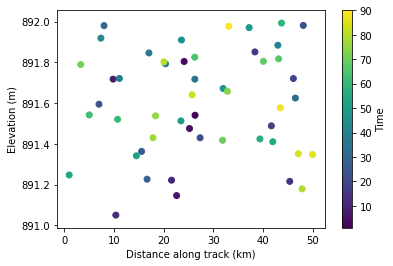

In [35]:
plt.figure()
plt.scatter(df_IS['dist'], df_IS['elev'], c=df_IS['time'])
plt.xlabel('Distance along track (km)')
plt.ylabel('Elevation (m)')
plt.colorbar(label='Time')

# Calculate residual between ICESat-2 track crossovers and reference elevation profile

For each point in the ICESat-2 crossover dataframe `df_IS`, subtract it from the reference elevation at the same distance along-track.

In [42]:
r = []

pt_ref = 891 # filler value for reference elevation, to subtract from crossover elevations

for pt in df_IS:
    pt_res = df_IS['elev'][pt] - pt_ref
    r[pt,:] = [df_IS['dist'], pt_res, df_IS['time']]

res = pd.DataFrame(r, columns=['dist', 'res', 'time'])
    

KeyError: 'dist'